# Running POMDPy examples in Jupyter notebook
Pam Osborn Popp  
pamop@nyu.edu  
Feb 2018  

### *pam's to-do:*
- *Adjust valit method to use defaults when optional args are not supplied, and provide informative error messages when required args are not supplied*

### PURPOSE:

To give comprehensive instructions on how to set up and run the POMDPy examples in this Jupyter Notebook.

### SET UP:
###### Setting up an environment with all the proper packages to run this notebook

This notebook must be run in a Python environment equipped with:
- numpy >= 1.11
- matplotlib >= 1.4.3
- scipy >= 0.15.1
- future >= 0.16
- tensorflow >= 0.12

The POMDPy library at https://github.com/pemami4911/POMDPy requires the above packages (access the link for more detail on dependencies and examples). Within the environment, the POMDPy library itself must also be installed.

###### A comprehensive list of commands
After downloading python 3 via the Anaconda distribution, the following commands are sufficient:

```
conda create -n tensorflow python=3.5 # To create the new environment
source activate tensorflow # To enter the new environment
easy_install -U pip # To update pip to enable use of pip3
export TF_BINARY_URL=https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-0.12.1-py3-none-any.whl # To download tensorflow binary
pip3 install --ignore-installed --upgrade $TF_BINARY_URL # To install tensorflow in the environment
pip install --upgrade future # To install most recent version of future
conda install scipy # To install scipy (can also use pip)
conda install matplotlib # To install matplotlib
conda install jupyter # To install jupyter
pip install git+https://github.com/pemami4911/POMDPy.git # To install POMDPy repo
jupyter notebook # To open jupyter notebook and run this file and others in this repository
```

To exit the tensorflow environment:
```
source deactivate
```

Emami, P., Hamlet, A. J., & Crane, C. D. POMDPy: An Extensible Framework for Implementing Partially-Observable Markov Decision Processes in Python.

## Verifying your tensorflow install

A good thing to do before getting ahead of one's self.

In [2]:
# Below is a cute test to verify tensorflow is installed and working properly.

import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello).decode())

# NOTE: you can also run this test in the command line to verify your tensorflow install - 
# within the tensorflow environment, after you have pip installed the tensorflow binary,
# enter the command "python" to begin running python and then enter the above lines.

Hello, TensorFlow!


## Running the "Tiger" POMDPy example

POMDPy recommends running the following on the command line (in your environment) to run this example:

```
python vi.py --env Tiger --solver LinearAlphaNet --use_tf --n_epochs 5000 --max_steps 50 --test 5 --learning_rate 0.05 --learning_rate_decay 0.996 --learning_rate_minimum 0.00025 --learning_rate_decay_step 50 --beta 0.001 --epsilon_start 0.2 --epsilon_minimum 0.02 --epsilon_decay 0.99 --epsilon_decay_step 75 --seed 12157 --save
```

However, below we will run the example within this very notebook by slightly adjusting the vi.py function, as well as changing a few particular arguments (parameters) to the model.

In [3]:
# Tiger example
from __future__ import print_function
from libraries.pomdpy.pomdpy import Agent
from libraries.pomdpy.pomdpy.solvers import ValueIteration
from libraries.pomdpy.pomdpy.log import init_logger
from libraries.pomdpy.examples.tiger import TigerModel
import argparse
import numpy as np

In [3]:
# Value iteration function (adapted from libraries/pomdpy/vi.py which is suited for command line use)
def valit(**args):
# *** POP TODO ***
# REQUIRED INPUTS:
#     env="Tiger" 
#     solver="LinearAlphaNet" 
# Defaults:
#     seed=1993
#     use_tf=True
#     discount=0.95
#     n_epochs=1000
#     max_steps=10
#     save=False
#     learning_rate=0.05, 
#     learning_rate_minimum=0.0025 # POP NOTE: in vi.py this is 0.0025 but in example it is 0.00025
#     learning_rate_decay=0.996
#     learning_rate_decay_step=50
#     beta=0.001
#     test=10
#     epsilon_start=0.2 # POP NOTE: in vi.py this is 0.02 but I imagine must intend to be 0.2 as in example
#     epsilon_minimum=0.05 # POP NOTE: in example this is 0.02
#     epsilon_decay=0.96 # POP NOTE: in example this is 0.99
#     epsilon_decay_step=75
#     planning_horizon=5
    
    init_logger()

    np.random.seed(int(args['seed']))

    if args['solver'] == 'VI-Baseline':
        from experiments.scripts import approximate_vi_eval

        env = TigerModel(args)
        solver = ValueIteration
        agent = Agent(env, solver)
        approximate_vi_eval.eval_baseline(args['n_epochs'], agent, args['planning_horizon'])

    else:
        if args['solver'] == 'ValueIteration':
            solver = ValueIteration
        elif args['use_tf'] and args['solver'] == 'LinearAlphaNet':
            from pomdpy.solvers.linear_alpha_net import LinearAlphaNet
            solver = LinearAlphaNet
        else:
            raise ValueError('solver not supported')

        if args['env'] == 'Tiger':
            env = TigerModel(args)
            agent = Agent(env, solver)
            agent.discounted_return()
        else:
            print('Unknown env {}'.format(args['env']))

In [4]:
valit(env="Tiger", solver="LinearAlphaNet", seed=2000, use_tf=True, discount=0.95, n_epochs=1000, max_steps=10, save=True, learning_rate=0.05, learning_rate_minimum=0.0025, learning_rate_decay=0.996, learning_rate_decay_step=50,beta=0.001, test=10, epsilon_start=0.2, epsilon_minimum=0.05, epsilon_decay=0.96, epsilon_decay_step=75, planning_horizon=5)

{'beta': 0.001,
 'discount': 0.95,
 'env': 'Tiger',
 'epsilon_decay': 0.96,
 'epsilon_decay_step': 75,
 'epsilon_minimum': 0.05,
 'epsilon_start': 0.2,
 'learning_rate': 0.05,
 'learning_rate_decay': 0.996,
 'learning_rate_decay_step': 50,
 'learning_rate_minimum': 0.0025,
 'max_steps': 10,
 'n_epochs': 1000,
 'planning_horizon': 5,
 'save': True,
 'seed': 2000,
 'solver': 'LinearAlphaNet',
 'test': 10,
 'use_tf': True}
 [*] Loading checkpoints...
 [!] Load FAILED: /Users/pamop/anaconda3/envs/tensorflow/lib/python3.5/site-packages/pomdpy/pomdp/../../experiments/checkpoints
evaluating agent at epoch 0...
evaluating agent at epoch 10...
evaluating agent at epoch 20...
evaluating agent at epoch 30...
evaluating agent at epoch 40...
evaluating agent at epoch 50...
evaluating agent at epoch 60...
evaluating agent at epoch 70...
evaluating agent at epoch 80...
evaluating agent at epoch 90...
evaluating agent at epoch 100...
evaluating agent at epoch 110...
evaluating agent at epoch 120...
ev

#### Solver output
Now to observe the output... which unfortunately saves to my environment's rendition of pomdpy instead of being preserved in this notebook so the following code won't run except on my computer (would have to change filename to make it work on other comps)

AlphaVector class:
"Simple wrapper for an alpha vector, used for representing the value function for a POMDP as a piecewise-linear, convex function"
has data fields/attributes: .action, .v

In [4]:
import pprint, pickle

# Unpickle Linear alpha net vectors pickle
pkl_file = open('/Users/pamop/anaconda3/envs/tensorflow/lib/python3.5/site-packages/experiments/pickle_jar/linear_alpha_net_vectors.pkl', 'rb')
alpha_vectors = pickle.load(pkl_file)
# pprint.pprint(data1)

alphavecs = np.zeros([3,2])

# Print alpha vector data to screen
for i in range(0, len(alpha_vectors)):
    vec = alpha_vectors.pop()
    print("Alpha vector ", str(i+1),": action =", str(vec.action), ", v =", str(vec.v))
    
    # Going to hardcode saving these alpha vecs in a structure to plot them:
    alphavecs[vec.action] = vec.v


Alpha vector  1 : action = 1 , v = [-4.2419715  2.1209857]
Alpha vector  2 : action = 2 , v = [ 2.1209857 -4.2419715]
Alpha vector  3 : action = 0 , v = [0.16147786 0.16147786]


In [5]:
alphavecs

array([[ 0.16147786,  0.16147786],
       [-4.24197149,  2.12098575],
       [ 2.12098575, -4.24197149]])

##### Alpha vector output, visualized

In the tiger problem example,  
action 0 = listen  
action 1 = open door 1 (left)  
action 2 = open door 2 (right)  

So we will plot the alpha vectors for these actions (e.g, the value of the action as a vector across the belief space).  

If belief that tiger is behind right door is between 0.3 and 0.7, listen; if above 0.7, open left door, if below 0.3, open right door. This is not a very conservative policy - there must not be too extreme of a cost for greeting the tiger face to face.  

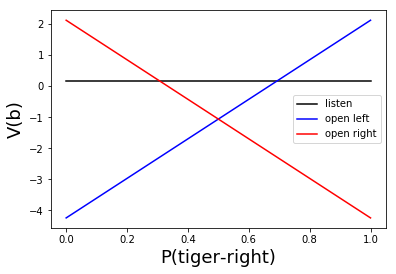

In [16]:
import matplotlib.pyplot as plt

avecs = alphavecs.T


# plt.plot(alphavecs.T)
plt.plot(avecs[:,0],'k',avecs[:,1],'b',avecs[:,2],'r')
plt.ylabel('V(b)',size=18)
plt.xlabel('P(tiger-right)',size=18)
plt.legend(['listen','open left','open right'], loc="best")
plt.show()



In [8]:
avecs = alphavecs.T
avecs[:,1]

array([-4.24197149,  2.12098575])